# Requerimiento.

Desarrolla un programa *("histogram_sales_long_delay.py")* que construya el histograma de frecuencias de la variable total_sales, junto con los intervalos que define la regla empírica débil para encontrar el 88.88% de los datos alrededor del promedio, restringiendo el análisis a las órdenes que tienen status completo. El resultado de este script deberá ser una figura denominada *“histogram_sales_long_delay.png”*

# 1. Importamos Librerías

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Validamos que exista el archivo

In [2]:
PATH = 'C:/Users/eramadel/Documents/Afirme/Datos/Digital_NAO/'
FILE_NAME = 'oilst_processed.csv'

In [3]:
print(f'Validamos que exista la ruta {PATH}{FILE_NAME}')
os.path.exists(f'{PATH}{FILE_NAME}')

Validamos que exista la ruta C:/Users/eramadel/Documents/Afirme/Datos/Digital_NAO/oilst_processed.csv


True

# 3. Creamos el df

In [4]:
df_oilst = pd.read_csv(f'{PATH}{FILE_NAME}')
df_oilst.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.84,2017,...,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,SP,São Paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,25.53,2018,...,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,BA,Bahia
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,61.56,2018,...,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,GO,Goiás
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,60.30,2017,...,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,RN,Rio Grande do Norte
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,80.97,2018,...,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP,SP,São Paulo


In [5]:
df_oilst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   distance_distribution_center   96470 non-null  float64
 9   year                           99441 non-null  int64  
 10  month                          99441 non-null  int64  
 11  quarter                        99441 non-null  object 
 12  year_month                     99441 non-null 

In [6]:
#Creamos lista de columnas que deben ser tipo fecha
columns_dates=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

# Creacion del df con el parseo de las fechas
df_oilst = pd.read_csv(
    os.path.join(PATH, FILE_NAME),
    parse_dates=columns_dates
    )

In [7]:
df_oilst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   distance_distribution_center   96470 non-null  float64       
 9   year                           99441 non-null  int64         
 10  month                          99441 non-null  int64         
 11  quarter        

In [8]:
df_oilst.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
35584,38d4786d1c7b6dae14470fdfb8616bb0,f5498d05cf105bdd3bc601ff77601d7b,delivered,2018-08-01 20:32:43,2018-08-02 20:25:17,2018-08-03 13:26:00,2018-08-09 21:34:50,2018-08-21,99.55,2018,...,8735,mogi das cruzes,SP,8735.0,-23.530154,-46.207890,mogi das cruzes,SP,SP,São Paulo
29967,28b6917cb6d7f6fe0540986342ec6866,da60fc458fbb1d80edcd359e2116d015,delivered,2018-08-01 08:37:07,2018-08-01 08:50:14,2018-08-01 16:00:00,2018-08-07 19:48:37,2018-08-16,63.09,2018,...,29311,cachoeiro de itapemirim,ES,29311.0,-20.847943,-41.146181,cachoeiro de itapemirim,ES,ES,Espírito Santo
61305,67519e1fe10bb3e4a5b416a24f846f8e,f8291e8b8489bfd516ec56628058a810,delivered,2017-06-07 10:33:25,2017-06-07 10:45:36,2017-06-26 16:43:53,2017-07-03 15:08:47,2017-06-28,37.05,2017,...,15045,sao jose do rio preto,SP,15045.0,-20.773264,-49.385592,sao jose do rio preto,SP,SP,São Paulo
78625,a26bdfa860437e3b9199a81b6003d928,863e3a165607322347d4d4d2f051d519,delivered,2018-07-31 07:37:42,2018-07-31 07:50:12,2018-07-31 16:26:00,2018-08-07 21:04:31,2018-08-14,1.59,2018,...,72726,brasilia,DF,72726.0,-15.667892,-48.203010,brasilia,DF,DF,Distrito Federal
41614,00cf47526e0f7920b381b2baf4ecf1c7,1563bfe4b8d21ed87a2dd20cb1fae1a7,delivered,2017-02-09 13:21:46,2017-02-09 13:35:21,2017-02-10 13:27:09,2017-02-16 10:34:15,2017-03-17,3.75,2017,...,16013,aracatuba,SP,16013.0,-21.223505,-50.423810,aracatuba,SP,SP,São Paulo


# 4. Desarrollo

Primero debemos generar un df de puras órdenes terminadas.

In [9]:
df_delivered = df_oilst.query("order_status  == 'delivered' ")
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.84,2017,...,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,SP,São Paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,25.53,2018,...,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA,BA,Bahia
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,61.56,2018,...,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO,GO,Goiás
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,60.30,2017,...,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,RN,Rio Grande do Norte
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,80.97,2018,...,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP,SP,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,68.26,2017,...,12209,sao jose dos campos,SP,12209.0,-23.178732,-45.889711,são josé dos campos,SP,SP,São Paulo
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,14.92,2018,...,11722,praia grande,SP,11722.0,-24.001467,-46.446355,praia grande,SP,SP,São Paulo
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,36.37,2017,...,45920,nova vicosa,BA,45920.0,-17.891522,-39.370942,nova vicosa,BA,BA,Bahia
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,32.04,2018,...,28685,japuiba,RJ,28685.0,-22.555985,-42.690761,japuiba,RJ,RJ,Rio de Janeiro


La regla empírica débil para encontrar el 88.88% de datos alrededor del promedio es el intervalo definido por la media y tres veces la desviación estándar.

min_ylim 0.0
max_ylim 22188.6
media -11.17812572885353
x3_desviacion 30.553061781613394


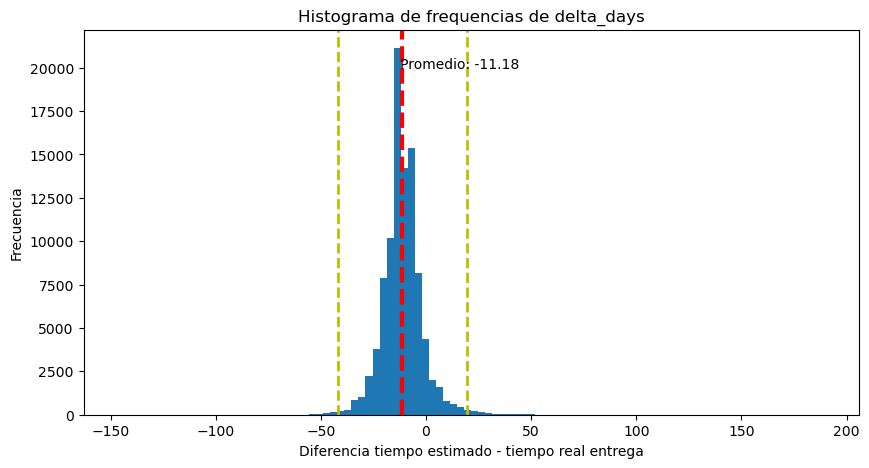

In [15]:
# titulo y etiquetas
titulo = 'Histograma de frequencias de delta_days'
x_label = 'Diferencia tiempo estimado - tiempo real entrega'
y_label = 'Frecuencia'

# Variable para guardar la gráfica
FILE_GRAFICA = 'histogram_sales_long_delay.png'

# creamos el subplot
fig, ax = plt.subplots(figsize=(10, 5))

# numero de intervalos para conteos
n_bins = 100

# creacion del objeto historgama
n, bins, patches = ax.hist(
    df_delivered['delta_days'],
    n_bins
    )

#Establecemos titulo y ejes "x" y "y"
ax.set_title(titulo )
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# Obtenemos la media
media = df_delivered['delta_days'].mean()

# Obtenemos 3 veces la desviación estándar
x3_desviacion = 3 * df_delivered['delta_days'].std()

# Linea para la media la cual identificaremos de color rojo
plt.axvline(
    media,
    color='r',
    linestyle='dashed',
    linewidth=3)

# Linea para la media + 3 veces la desviación estándar la cual identificaremos color amarillo
plt.axvline(
    media + x3_desviacion,
    color='y',
    linestyle='dashed',
    linewidth=2)

# Linea para la media - 3 veces la desviación estándar la cual identificaremos color amarillo
plt.axvline(
    media - x3_desviacion,
    color='y',
    linestyle='dashed',
    linewidth=2)

# limites de la figura
min_ylim, max_ylim = plt.ylim()

# Etiquetas
plt.text(
   media *1.1,
    max_ylim*0.9,
    'Promedio: {:.2f}'.format(media)
    )

print(f'min_ylim {min_ylim}')
print(f'max_ylim {max_ylim}')
print(f'media {media}')
print(f'x3_desviacion {x3_desviacion}')
plt.savefig(f'{PATH}{FILE_GRAFICA}', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>